In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
import nltk
nltk.download('stopwords')

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\dinhd\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [16]:
df = pd.read_csv('Twitter_Data.csv')

In [17]:
df = df.dropna()

In [18]:
def text_normalize(text):
    text = text.lower()
    text = re.sub(r'^rt[\s]+', '', text)
    text = re.sub(r'https?:\/\/.*[\r\n]*', '', text )
    text = re.sub(r'[^\w\s]', '', text )
    
    stop_words = set(stopwords.words('english'))
    words = text.split()
    words = [word for word in words if word not in stop_words]
    text = ' '.join(words)
    
    stemmer = SnowballStemmer('english')
    words = text.split()
    words = [stemmer.stem(word) for word in words]
    text = ' '.join(words)
    
    return text

In [19]:
df['clean_text'] = df['clean_text'].apply(lambda x: text_normalize(x))

In [20]:
vectorizer = TfidfVectorizer(max_features = 2000)
X = vectorizer.fit_transform(df['clean_text']).toarray()

In [21]:
intercept = np.ones((
    X.shape[0], 1))
X_b = np.concatenate(
    (intercept, X),
    axis = 1)

In [22]:
n_classes = df['category'].nunique()
n_samples = df['category'].size

y = df['category'].to_numpy() + 1
y = y.astype(np.uint8)
y_encoded = np.array(
    [np.zeros(n_classes) for _ in range(n_samples)])
y_encoded[np.arange(n_samples), y] = 1

In [23]:
val_size = 0.2
test_size = 0.125
random_state = 2
is_shuffle = True

X_train, X_val, y_train, y_val = train_test_split(
    X_b, y_encoded,
    test_size = val_size,
    random_state = random_state,
    shuffle = is_shuffle)

X_train, X_test, y_train, y_test = train_test_split(
    X_train, y_train,
    test_size = test_size,
    random_state = random_state,
    shuffle = is_shuffle)

In [ ]:
def softmax(z):
    exp_z = np.exp(z)
    
    return exp_z / exp_z.sum(axis = 1)[:, None]

def predict(X, theta):
    z = np.dot(X, theta)
    y_hat = softmax(z)
    
    return y_hat

def compute_loss(y_hat, y):
    n = y.size
    
    return (-1 / n) * np.sum(y * np.log(y_hat))

def compute_gradient(X, y, y_hat):
    n = y.size
    
    return np.dot(X.T, (y_hat - y)) / n

def update_theta(theta, gradient, lr):
    return theta - lr * gradient

def compute_accuracy(X, y, theta):
    y_hat = predict(X, theta)
    acc = (np.argmax(y_hat, axis = 1) == np.argmax(y, axis = 1)).mean()
    return acc

In [31]:
lr = 0.1
epochs = 200
batch_size = X_train.shape[0]
n_features = X_train.shape[1]

np.random.seed(random_state)
theta = np.random.uniform(
    size = (n_features, n_classes))

In [32]:
train_accs = []
train_losses = []
val_accs = []
val_losses = []

for epoch in range(epochs):
    train_batch_losses = []
    train_batch_accs = []
    val_batch_losses = []
    val_batch_accs = []
    
    for i in range(0, X_train.shape[0], batch_size):
        X_i = X_train[i:i+batch_size]
        y_i = y_train[i:i+batch_size]
        
        y_hat = predict(X_i, theta)
        
        train_loss = compute_loss(y_hat, y_i)
        gradient = compute_gradient(X_i, y_i, y_hat)
        theta = update_theta(theta, gradient, lr)
        
        train_batch_losses.append(train_loss)
        
        train_acc = compute_accuracy(X_train, y_train, theta)
        train_batch_accs.append(train_acc)
        
        y_val_hat = predict(X_val, theta)
        val_loss = compute_loss(y_val_hat, y_val)
        val_batch_losses.append(val_loss)
        
        val_acc = compute_accuracy(X_val, y_val, theta)
        val_batch_accs.append(val_acc)
        
    train_batch_loss = sum(train_batch_losses) / len(train_batch_losses)
    val_batch_loss = sum(val_batch_losses) / len(val_batch_losses)
    train_batch_acc = sum(train_batch_accs) / len(train_batch_accs)
    val_batch_acc = sum(val_batch_accs) / len(val_batch_accs)
    
    train_losses.append(train_batch_loss)
    val_losses.append(val_batch_loss)
    train_accs.append(train_batch_acc)
    val_accs.append(val_batch_acc)
    
    print(f'\n EPOCH {epoch + 1}: \t Training loss: {train_batch_loss:.3f}\t Validation loss: {val_batch_loss:.3f}')


 EPOCH 1: 	 Training loss: 0.379	 Validation loss: 0.379

 EPOCH 2: 	 Training loss: 0.379	 Validation loss: 0.378

 EPOCH 3: 	 Training loss: 0.378	 Validation loss: 0.378

 EPOCH 4: 	 Training loss: 0.378	 Validation loss: 0.378

 EPOCH 5: 	 Training loss: 0.378	 Validation loss: 0.377

 EPOCH 6: 	 Training loss: 0.377	 Validation loss: 0.377

 EPOCH 7: 	 Training loss: 0.377	 Validation loss: 0.377

 EPOCH 8: 	 Training loss: 0.377	 Validation loss: 0.376

 EPOCH 9: 	 Training loss: 0.376	 Validation loss: 0.376

 EPOCH 10: 	 Training loss: 0.376	 Validation loss: 0.376

 EPOCH 11: 	 Training loss: 0.376	 Validation loss: 0.375

 EPOCH 12: 	 Training loss: 0.376	 Validation loss: 0.375

 EPOCH 13: 	 Training loss: 0.375	 Validation loss: 0.375

 EPOCH 14: 	 Training loss: 0.375	 Validation loss: 0.375

 EPOCH 15: 	 Training loss: 0.375	 Validation loss: 0.374

 EPOCH 16: 	 Training loss: 0.374	 Validation loss: 0.374

 EPOCH 17: 	 Training loss: 0.374	 Validation loss: 0.374

 EPOC

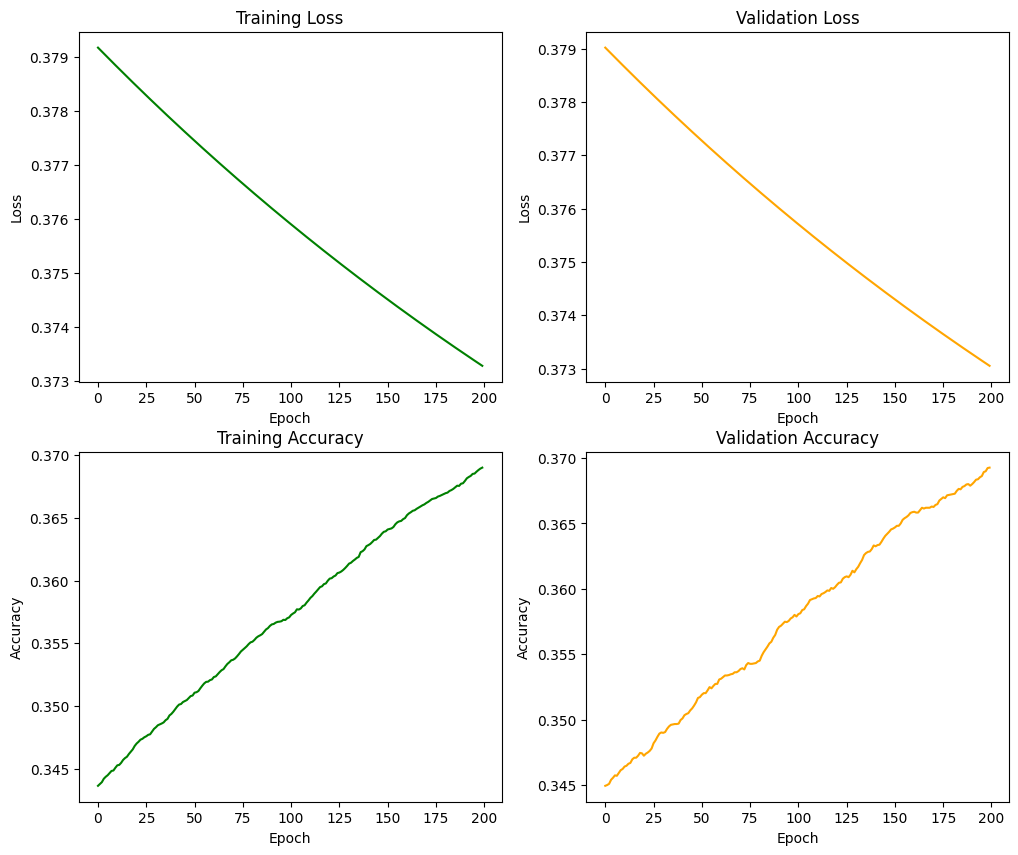

In [27]:
fig, ax = plt.subplots(2, 2, figsize=(12, 10))
ax[0, 0].plot(train_losses, color='green')
ax[0, 0].set(xlabel='Epoch', ylabel='Loss')
ax[0, 0].set_title('Training Loss')

ax[0, 1].plot(val_losses, color='orange')
ax[0, 1].set(xlabel='Epoch', ylabel='Loss')
ax[0, 1].set_title('Validation Loss')

ax[1, 0].plot(train_accs, color='green')
ax[1, 0].set(xlabel='Epoch', ylabel='Accuracy')
ax[1, 0].set_title('Training Accuracy')

ax[1, 1].plot(val_accs, color='orange')
ax[1, 1].set(xlabel='Epoch', ylabel='Accuracy')
ax[1, 1].set_title('Validation Accuracy')

plt.show()

In [29]:
# Val set
val_set_acc = compute_accuracy(X_val, y_val, theta)
print('Evaluation on validation set:')
print(f'Accuracy: {val_set_acc}')

Evaluation on validation set:
Accuracy: 0.3692704178683193


In [30]:
# Test set
test_set_acc = compute_accuracy(X_test, y_test, theta)
print('Evaluation on test set:')
print(f'Accuracy: {test_set_acc}')

Evaluation on test set:
Accuracy: 0.3648524268270234
